In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df['Research'].value_counts()

1    219
0    181
Name: Research, dtype: int64

In [8]:
df_new = df.drop(['Serial No.'],axis=1)

In [9]:
df_new.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
X = df_new.loc[:,df_new.columns!= 'Chance of Admit ']

In [12]:
y = df_new['Chance of Admit ']

In [13]:
print(X)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
395        324          110                  3  3.5   3.5  9.04         1
396        325          107                  3  3.0   3.5  9.11         1
397        330          116                  4  5.0   4.5  9.45         1
398        312          103                  3  3.5   4.0  8.78         0
399        333          117                  4  5.0   4.0  9.66         1

[400 rows x 7 columns]


In [14]:
print(y)

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64


In [15]:
y[y>0.70] = 1
y[y<=0.70] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [17]:
y.value_counts()

1.0    235
0.0    165
Name: Chance of Admit , dtype: int64

In [18]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [19]:
X.iloc[:,1]

0      118
1      107
2      104
3      110
4      103
      ... 
395    110
396    107
397    116
398    103
399    117
Name: TOEFL Score, Length: 400, dtype: int64

0


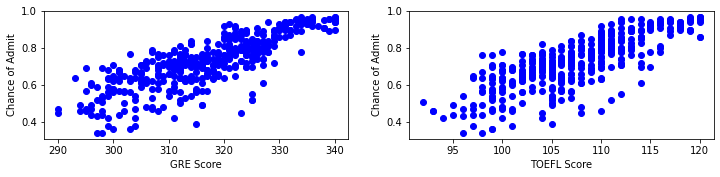

2


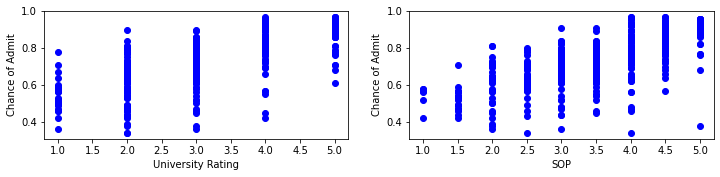

4


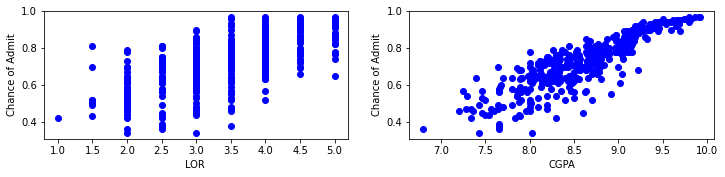

In [35]:


for i in range(0,len(X.columns)-2,2):

  plt.figure(figsize=(12,8))

  plt.subplot(3,2,i+1)
  plt.scatter(X.iloc[:,i],df['Chance of Admit '],color='b')
  plt.xlabel(X.columns[i])
  plt.ylabel('Chance of Admit')

  plt.subplot(3,2,i+2)
  plt.scatter(X.iloc[:,i+1],df['Chance of Admit '],color='b')
  plt.xlabel(X.columns[i+1])
  plt.ylabel('Chance of Admit')
  print(i)
  plt.show()

In [36]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [37]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [41]:
y.value_counts()

1.0    235
0.0    165
Name: Chance of Admit , dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [63]:
 print("X_train size is : ",X_train.shape)
 print("X_test size is: ",X_test.shape)
 print("y_train size is ",y_train.shape)
 print("y_test size is: ",y_test.shape)

X_train size is :  (300, 7)
X_test size is:  (100, 7)
y_train size is  (300,)
y_test size is:  (100,)


In [64]:
y_train.value_counts()

1.0    177
0.0    123
Name: Chance of Admit , dtype: int64

In [65]:
y_test.value_counts()

1.0    58
0.0    42
Name: Chance of Admit , dtype: int64

[Text(0.4925, 0.9545454545454546, 'X[5] <= 8.63\ngini = 0.484\nsamples = 300\nvalue = [123, 177]'),
 Text(0.225, 0.8636363636363636, 'X[5] <= 8.085\ngini = 0.401\nsamples = 148\nvalue = [107, 41]'),
 Text(0.06, 0.7727272727272727, 'X[1] <= 113.0\ngini = 0.063\nsamples = 61\nvalue = [59, 2]'),
 Text(0.04, 0.6818181818181818, 'X[0] <= 315.5\ngini = 0.033\nsamples = 60\nvalue = [59, 1]'),
 Text(0.02, 0.5909090909090909, 'gini = 0.0\nsamples = 56\nvalue = [56, 0]'),
 Text(0.06, 0.5909090909090909, 'X[4] <= 3.25\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.04, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08, 0.5, 'X[0] <= 319.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08, 0.6818181818181818, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.39, 0.7727272727272727, 'X[6] <= 0.5\ngini = 0.495\nsamples = 87\nval

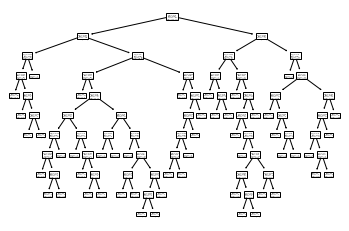

In [83]:
# Applying Machine learning algorithm

from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(X_train,y_train)
tree.plot_tree(clf)

In [84]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Decision tree") 

'Decision tree.pdf'

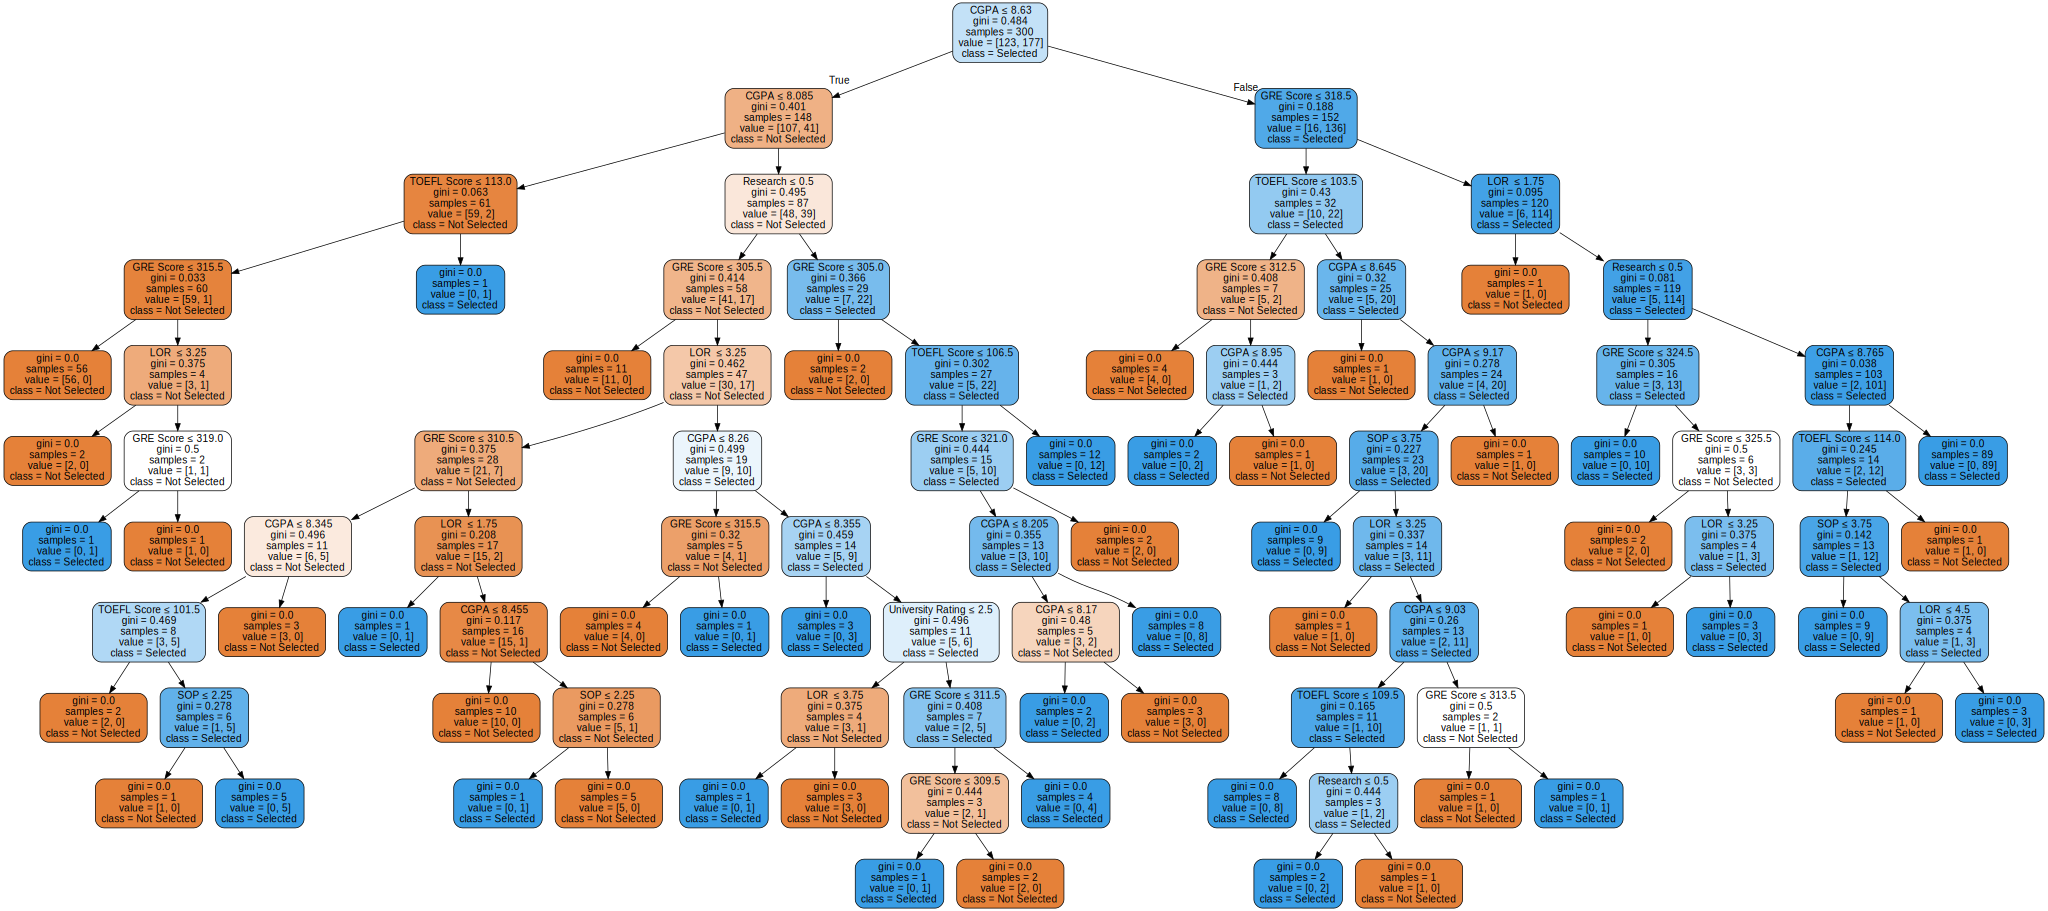

In [85]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names=['Not Selected','Selected'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predict = clf.predict(X_test)

mse = mean_squared_error(y_test,predict)
mae = mean_absolute_error(y_test,predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,predict)

print("MSE is: ",mse)
print("MAE is: ",mae)
print("RMSE is: ",rmse)
print("R2 score is: ",r2)

MSE is:  0.18
MAE is:  0.18
RMSE is:  0.4242640687119285
R2 score is:  0.26108374384236466


In [72]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predict)
conf_matrix

array([[33,  9],
       [ 7, 51]])

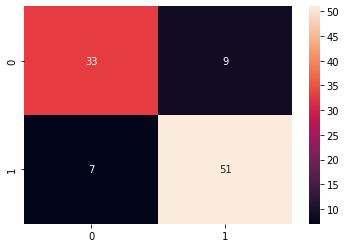

In [73]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [78]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predict,y_test)
print("Accuracy of the model on the test set is: ",accuracy*100,"%")

Accuracy of the model on the test set is:  84.0 %
